In [1]:
import numpy as np
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, assemble, transpile
from qiskit.visualization import plot_histogram


"""

Reglas Metamórficas implementadas para el algoritmo de Deutsch-Jozsa:

I) Si aplicamos el algoritmo a una función oráculo f (equilibrada o constante) se obtendrá el mismo 
      resultado que al aplicar una función g : {0,1}^n -> {0,1}^n biyectiva.

II) Si aplicamos el algoritmo a una función oráculo f (equilibrada o constante) se obtendrá el mismo 
       resultado que con su función complementaria h(x) = 1 - f(x).
       
"""


# Función que implementa una función oráculo para el algoritmo de Deutsch-Jozsa
def oracle_sum(function_type, n):
    oracle_sum = QuantumCircuit(n+1)
    
    if function_type == "equilibrada":    
        for i in range(n):
            oracle_sum.cx(i,n)

    elif function_type == "constante":
        constant = np.random.randint(2)
        if constant == 1:
            oracle_sum.x(n)
    
    sum_gate = oracle_sum.to_gate(label = 'oraculo')
    return sum_gate


# Función que implementa el algoritmo de Deutsch-Jozsa y las reglas metamórficas
def deutsch_jozsa(oraculo, n, regla = 0):
    
    # Creamos el circuito cuántico y colocamos los qubits en sus estados iniciales
    deutsch_jozsa_circuit = QuantumCircuit(n+1, n)
    deutsch_jozsa_circuit.x(n)
    deutsch_jozsa_circuit.barrier()
    
    for i in range(n+1):
        deutsch_jozsa_circuit.h(i)
    deutsch_jozsa_circuit.barrier()
        
    # Añadimos el oráculo junto con las puertas adecuadas para cada regla
    if regla == 1:
        for i in range(n):
            deutsch_jozsa_circuit.x(i)
            
    deutsch_jozsa_circuit.append(oraculo, range(n+1))
    
    if regla == 2:
        deutsch_jozsa_circuit.x(n)   
    deutsch_jozsa_circuit.barrier()
    
    # Por último, aplicamos las puertas de Hadamard y medimos los n primeros qubits del sistema
    for i in range(n):
        deutsch_jozsa_circuit.h(i)
    deutsch_jozsa_circuit.barrier()
    
    for i in range(n):
        deutsch_jozsa_circuit.measure(i,i)
    
    return deutsch_jozsa_circuit

In [2]:

# Creación de los circuitos cuánticos correspondientes al algoritmo y las reglas
n = 4

# circuitos de los distintos oráculos
oraculo_constante = oracle_sum('constante', n)
oraculo_equilibrada = oracle_sum('equilibrada', n)

# circuitos del algoritmo base según el oráculo
dj_algoritmo_constante = deutsch_jozsa(oraculo_constante, n)
dj_algoritmo_equilibrada = deutsch_jozsa(oraculo_equilibrada, n)

# circuitos para la primera regla según el oráculo 
dj_reglaI_constante = deutsch_jozsa(oraculo_constante, n, regla = 1)
dj_reglaI_equilibrada = deutsch_jozsa(oraculo_equilibrada, n, regla = 1)

# circuitos para la segunda regla según el oráculo
dj_reglaII_constante = deutsch_jozsa(oraculo_constante, n, regla = 2)
dj_reglaII_equilibrada = deutsch_jozsa(oraculo_equilibrada, n, regla = 2)


In [3]:

# representación gráfica del circuito para el algoritmo base con el oráculo constante
dj_algoritmo_constante.draw()


░ ┌───┐ ░ ┌──────────┐ ░ ┌───┐ ░ ┌─┐         
q_0: ──────░─┤ H ├─░─┤0         ├─░─┤ H ├─░─┤M├─────────
           ░ ├───┤ ░ │          │ ░ ├───┤ ░ └╥┘┌─┐      
q_1: ──────░─┤ H ├─░─┤1         ├─░─┤ H ├─░──╫─┤M├──────
           ░ ├───┤ ░ │          │ ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ──────░─┤ H ├─░─┤2 oraculo ├─░─┤ H ├─░──╫──╫─┤M├───
           ░ ├───┤ ░ │          │ ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ──────░─┤ H ├─░─┤3         ├─░─┤ H ├─░──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ │          │ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├─░─┤ H ├─░─┤4         ├─░───────░──╫──╫──╫──╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░       ░  ║  ║  ║  ║ 
c: 4/════════════════════════════════════════╩══╩══╩══╩═
                                             0  1  2  3

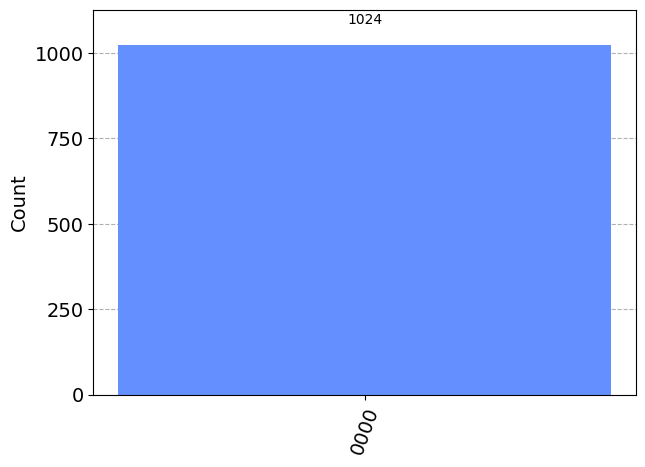

In [4]:

# Simulación del circuito cuántico creado para el algoritmo de Deutsch-Jozsa con el oráculo constante
sim = Aer.get_backend('qasm_simulator')
results = sim.run(transpile(dj_algoritmo_constante,sim)).result()
answer = results.get_counts()
plot_histogram(answer)


In [5]:

# representación gráfica del circuito para la primera regla con el oráculo constante
dj_reglaI_constante.draw()


░ ┌───┐ ░ ┌───┐┌──────────┐ ░ ┌───┐ ░ ┌─┐         
q_0: ──────░─┤ H ├─░─┤ X ├┤0         ├─░─┤ H ├─░─┤M├─────────
           ░ ├───┤ ░ ├───┤│          │ ░ ├───┤ ░ └╥┘┌─┐      
q_1: ──────░─┤ H ├─░─┤ X ├┤1         ├─░─┤ H ├─░──╫─┤M├──────
           ░ ├───┤ ░ ├───┤│          │ ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ──────░─┤ H ├─░─┤ X ├┤2 oraculo ├─░─┤ H ├─░──╫──╫─┤M├───
           ░ ├───┤ ░ ├───┤│          │ ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ──────░─┤ H ├─░─┤ X ├┤3         ├─░─┤ H ├─░──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ └───┘│          │ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├─░─┤ H ├─░──────┤4         ├─░───────░──╫──╫──╫──╫─
     └───┘ ░ └───┘ ░      └──────────┘ ░       ░  ║  ║  ║  ║ 
c: 4/═════════════════════════════════════════════╩══╩══╩══╩═
                                                  0  1  2  3

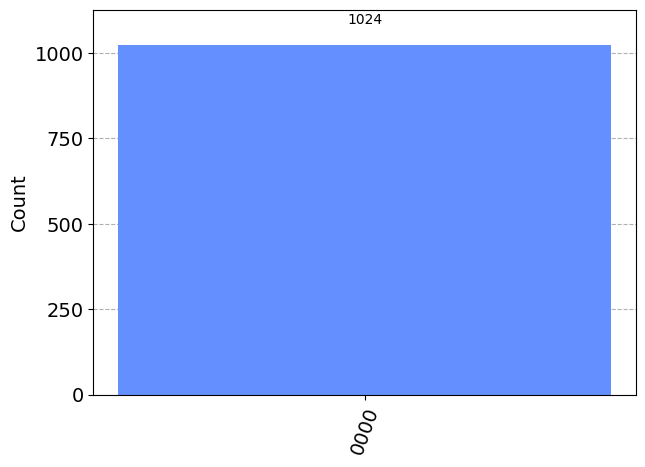

In [6]:

# Simulación del circuito cuántico creado para el algoritmo de Deutsch-Jozsa con el oráculo constante
sim = Aer.get_backend('qasm_simulator')
results = sim.run(transpile(dj_reglaI_constante,sim)).result()
answer = results.get_counts()
plot_histogram(answer)


In [7]:

# representación gráfica del circuito para la primera regla con el oráculo constante
dj_reglaII_constante.draw()


░ ┌───┐ ░ ┌──────────┐      ░ ┌───┐ ░ ┌─┐         
q_0: ──────░─┤ H ├─░─┤0         ├──────░─┤ H ├─░─┤M├─────────
           ░ ├───┤ ░ │          │      ░ ├───┤ ░ └╥┘┌─┐      
q_1: ──────░─┤ H ├─░─┤1         ├──────░─┤ H ├─░──╫─┤M├──────
           ░ ├───┤ ░ │          │      ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ──────░─┤ H ├─░─┤2 oraculo ├──────░─┤ H ├─░──╫──╫─┤M├───
           ░ ├───┤ ░ │          │      ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ──────░─┤ H ├─░─┤3         ├──────░─┤ H ├─░──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ │          │┌───┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├─░─┤ H ├─░─┤4         ├┤ X ├─░───────░──╫──╫──╫──╫─
     └───┘ ░ └───┘ ░ └──────────┘└───┘ ░       ░  ║  ║  ║  ║ 
c: 4/═════════════════════════════════════════════╩══╩══╩══╩═
                                                  0  1  2  3

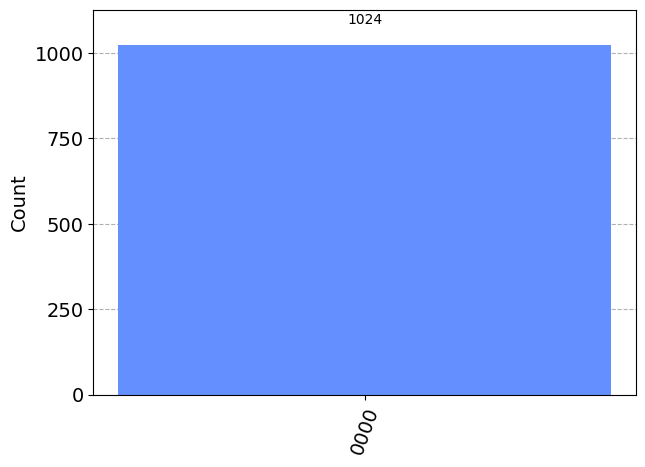

In [8]:

# Simulación del circuito cuántico creado para el algoritmo de Deutsch-Jozsa con el oráculo constante
sim = Aer.get_backend('qasm_simulator')
results = sim.run(transpile(dj_reglaII_constante,sim)).result()
answer = results.get_counts()
plot_histogram(answer)


In [9]:

# representación gráfica del circuito para el algoritmo base con el oráculo constante
dj_algoritmo_equilibrada.draw()


░ ┌───┐ ░ ┌──────────┐ ░ ┌───┐ ░ ┌─┐         
q_0: ──────░─┤ H ├─░─┤0         ├─░─┤ H ├─░─┤M├─────────
           ░ ├───┤ ░ │          │ ░ ├───┤ ░ └╥┘┌─┐      
q_1: ──────░─┤ H ├─░─┤1         ├─░─┤ H ├─░──╫─┤M├──────
           ░ ├───┤ ░ │          │ ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ──────░─┤ H ├─░─┤2 oraculo ├─░─┤ H ├─░──╫──╫─┤M├───
           ░ ├───┤ ░ │          │ ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ──────░─┤ H ├─░─┤3         ├─░─┤ H ├─░──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ │          │ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├─░─┤ H ├─░─┤4         ├─░───────░──╫──╫──╫──╫─
     └───┘ ░ └───┘ ░ └──────────┘ ░       ░  ║  ║  ║  ║ 
c: 4/════════════════════════════════════════╩══╩══╩══╩═
                                             0  1  2  3

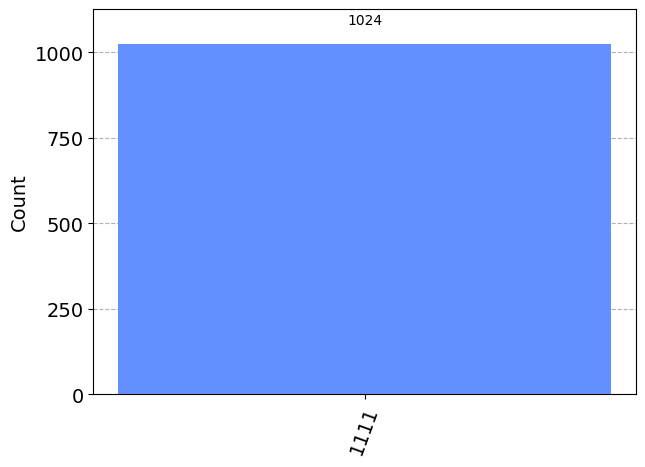

In [10]:

# Simulación del circuito cuántico creado para el algoritmo de Deutsch-Jozsa con el oráculo constante
sim = Aer.get_backend('qasm_simulator')
results = sim.run(transpile(dj_algoritmo_equilibrada,sim)).result()
answer = results.get_counts()
plot_histogram(answer)


In [11]:

# representación gráfica del circuito para la primera regla con el oráculo constante
dj_reglaI_equilibrada.draw()


░ ┌───┐ ░ ┌───┐┌──────────┐ ░ ┌───┐ ░ ┌─┐         
q_0: ──────░─┤ H ├─░─┤ X ├┤0         ├─░─┤ H ├─░─┤M├─────────
           ░ ├───┤ ░ ├───┤│          │ ░ ├───┤ ░ └╥┘┌─┐      
q_1: ──────░─┤ H ├─░─┤ X ├┤1         ├─░─┤ H ├─░──╫─┤M├──────
           ░ ├───┤ ░ ├───┤│          │ ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ──────░─┤ H ├─░─┤ X ├┤2 oraculo ├─░─┤ H ├─░──╫──╫─┤M├───
           ░ ├───┤ ░ ├───┤│          │ ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ──────░─┤ H ├─░─┤ X ├┤3         ├─░─┤ H ├─░──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ └───┘│          │ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├─░─┤ H ├─░──────┤4         ├─░───────░──╫──╫──╫──╫─
     └───┘ ░ └───┘ ░      └──────────┘ ░       ░  ║  ║  ║  ║ 
c: 4/═════════════════════════════════════════════╩══╩══╩══╩═
                                                  0  1  2  3

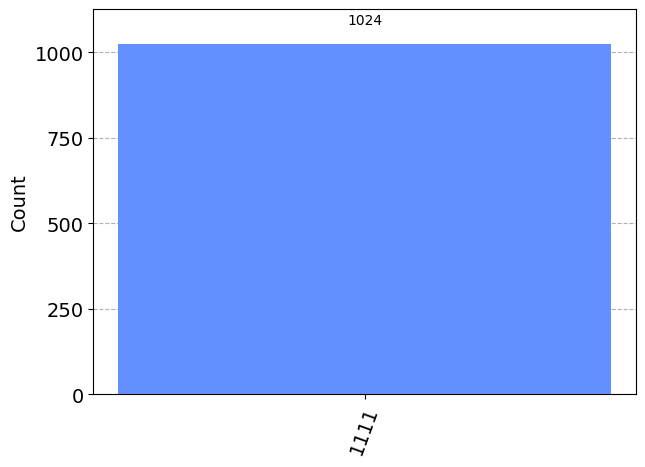

In [12]:

# Simulación del circuito cuántico creado para el algoritmo de Deutsch-Jozsa con el oráculo constante
sim = Aer.get_backend('qasm_simulator')
results = sim.run(transpile(dj_reglaI_equilibrada,sim)).result()
answer = results.get_counts()
plot_histogram(answer)


In [13]:

# representación gráfica del circuito para la primera regla con el oráculo constante
dj_reglaII_equilibrada.draw()


░ ┌───┐ ░ ┌──────────┐      ░ ┌───┐ ░ ┌─┐         
q_0: ──────░─┤ H ├─░─┤0         ├──────░─┤ H ├─░─┤M├─────────
           ░ ├───┤ ░ │          │      ░ ├───┤ ░ └╥┘┌─┐      
q_1: ──────░─┤ H ├─░─┤1         ├──────░─┤ H ├─░──╫─┤M├──────
           ░ ├───┤ ░ │          │      ░ ├───┤ ░  ║ └╥┘┌─┐   
q_2: ──────░─┤ H ├─░─┤2 oraculo ├──────░─┤ H ├─░──╫──╫─┤M├───
           ░ ├───┤ ░ │          │      ░ ├───┤ ░  ║  ║ └╥┘┌─┐
q_3: ──────░─┤ H ├─░─┤3         ├──────░─┤ H ├─░──╫──╫──╫─┤M├
     ┌───┐ ░ ├───┤ ░ │          │┌───┐ ░ └───┘ ░  ║  ║  ║ └╥┘
q_4: ┤ X ├─░─┤ H ├─░─┤4         ├┤ X ├─░───────░──╫──╫──╫──╫─
     └───┘ ░ └───┘ ░ └──────────┘└───┘ ░       ░  ║  ║  ║  ║ 
c: 4/═════════════════════════════════════════════╩══╩══╩══╩═
                                                  0  1  2  3

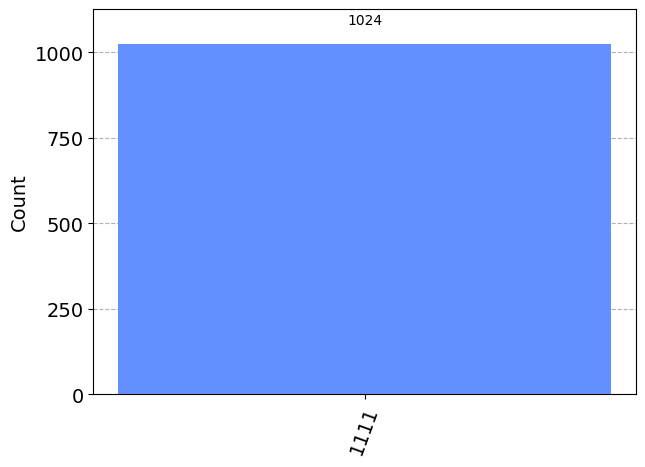

In [14]:

# Simulación del circuito cuántico creado para el algoritmo de Deutsch-Jozsa con el oráculo constante
sim = Aer.get_backend('qasm_simulator')
results = sim.run(transpile(dj_reglaII_equilibrada,sim)).result()
answer = results.get_counts()
plot_histogram(answer)
